In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

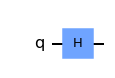

In [3]:
# Builds a very simple quantum circuit with one qubit
circ = QuantumCircuit(1)
circ.h(0)
circ.draw()

In [4]:
circ.draw(output="text")

┌───┐
q_0: ┤ H ├
     └───┘

In [6]:
# Let us try to obtain the quantum state
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.707+0.j]


In [9]:
# Print the measurement values
job.result().get_counts()

{'0': 0.5, '1': 0.5}

In [15]:
# Entanglement
circ2 = QuantumCircuit(2)
circ2.h(0)
circ2.cx(0,1)
circ2.draw(output="text")

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [18]:
job = backend.run(circ2)
result = job.result()
outputstate = result.get_statevector(circ2, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]


In [19]:
result.get_counts()

{'00': 0.5, '11': 0.5}

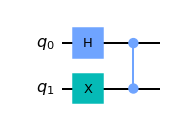

In [26]:
# Phase kickback experiment
circ3 = QuantumCircuit(2)
circ3.x(1)
circ3.h(0)
circ3.cz(0,1)
circ3.draw()

In [27]:
job = backend.run(circ3)
result = job.result()
outputstate = result.get_statevector(circ3, decimals=3)
print(outputstate)

[ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]


In [28]:
result.get_counts()

{'10': 0.5, '11': 0.5}

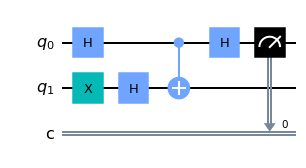

In [86]:
# Deutsch alg.
circD_id = QuantumCircuit(2,1)
circD_id.h(0)
circD_id.x(1)
circD_id.h(1)
# uncomment one of the following
circD_id.cx(0,1) # i.e. f = id
#circD_id.x(0) # i.e. f = swap
#circD_id.cx(0,1)
#circD_id.x(0)
#3. ...  # i.e. f is constant on 0
#4. circD_id.x(1) # i.e. f is constant on 1
circD_id.h(0)
circD_id.measure(0,0)
circD_id.draw()

In [87]:
job = backend.run(circD_id)
result = job.result()
outputstate = result.get_statevector(circD_id, decimals=3)
print(outputstate)

[ 0.   +0.j  0.707-0.j  0.   -0.j -0.707+0.j]


In [88]:
result.get_counts()

{'1': 1}